In [39]:
import os
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [40]:
file_path = './dataset/solar_245567.csv'
df = pd.read_csv(file_path, delimiter=',', decimal='.')
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')  # Ensure timestamp is in datetime format
df.set_index('timestamp', inplace=True)  # Set the timestamp as the index

In [42]:
df = df.resample('H').mean()  # Resample to hourly data
df = df.asfreq('H')  # Set frequency to hourly


/var/folders/25/s3qpsf9n5k9g2htyymdyb8ph0000gn/T/ipykernel_99095/1861225541.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H').mean()  # Resample to hourly data
/var/folders/25/s3qpsf9n5k9g2htyymdyb8ph0000gn/T/ipykernel_99095/1861225541.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.asfreq('H')  # Set frequency to hourly


In [44]:
missing_times = df.index[df.index.to_series().diff() != pd.Timedelta(hours=1)]
print("Missing timestamps:", missing_times)


Missing timestamps: DatetimeIndex(['2021-02-02 00:00:00'], dtype='datetime64[ns]', name='timestamp', freq='h')


In [45]:
# Display the first few rows of the DataFrame
print(df.head(24))  # Check the first 24 rows for one day

# Check the frequency of the index
print("Index frequency:", df.index.freq)

# Display unique timestamps to see if there are any anomalies
unique_timestamps = df.index.unique()
print("Unique timestamps:", unique_timestamps)


                     raw  temperature  modified1  modified2  modified3
timestamp                                                             
2021-02-02 00:00:00  0.0         -3.9        NaN        0.0        0.0
2021-02-02 01:00:00  0.0         -3.5        0.0        0.0        0.0
2021-02-02 02:00:00  0.0         -3.0        0.0        0.0        0.0
2021-02-02 03:00:00  0.0         -2.6        0.0        0.0        0.0
2021-02-02 04:00:00  0.0         -2.4        0.0        0.0        0.0
2021-02-02 05:00:00  0.0         -2.1        0.0        0.0        0.0
2021-02-02 06:00:00  0.0         -2.0        0.0        0.0        0.0
2021-02-02 07:00:00  0.0         -2.1        0.0        0.0        0.0
2021-02-02 08:00:00  0.0         -2.6        0.0        0.0        0.0
2021-02-02 09:00:00  0.0         -3.0        0.0        0.0        0.0
2021-02-02 10:00:00  0.0         -3.2        0.0        0.0        0.0
2021-02-02 11:00:00  0.0         -3.6        0.0        0.0        0.0
2021-0

In [46]:
unique_timestamps = df.index.unique()
print("Number of unique timestamps:", len(unique_timestamps))


Number of unique timestamps: 17520


In [47]:
nan_timestamps = df[df['raw'].isna()]

# Print the timestamps with NaN values
print("Timestamps with NaN values:")
print(nan_timestamps)

Timestamps with NaN values:
                     raw  temperature  modified1  modified2  modified3
timestamp                                                             
2021-03-01 00:00:00  NaN          NaN        NaN        NaN        NaN
2021-03-01 01:00:00  NaN          NaN        NaN        NaN        NaN
2021-03-01 02:00:00  NaN          NaN        NaN        NaN        NaN
2021-03-01 03:00:00  NaN          NaN        NaN        NaN        NaN
2021-03-01 04:00:00  NaN          NaN        NaN        NaN        NaN
...                  ...          ...        ...        ...        ...
2023-01-12 19:00:00  NaN          NaN        NaN        NaN        NaN
2023-01-12 20:00:00  NaN          NaN        NaN        NaN        NaN
2023-01-12 21:00:00  NaN          NaN        NaN        NaN        NaN
2023-01-12 22:00:00  NaN          NaN        NaN        NaN        NaN
2023-01-12 23:00:00  NaN          NaN        NaN        NaN        NaN

[504 rows x 5 columns]


In [48]:

# Fill NaN values with the nearest non-NaN value (backward and forward)
df['raw'] = df['raw'].fillna(method='ffill').fillna(method='bfill')

# Check the DataFrame to see the filled values
print(df)


                     raw  temperature  modified1  modified2  modified3
timestamp                                                             
2021-02-02 00:00:00  0.0         -3.9        NaN        0.0        0.0
2021-02-02 01:00:00  0.0         -3.5        0.0        0.0        0.0
2021-02-02 02:00:00  0.0         -3.0        0.0        0.0        0.0
2021-02-02 03:00:00  0.0         -2.6        0.0        0.0        0.0
2021-02-02 04:00:00  0.0         -2.4        0.0        0.0        0.0
...                  ...          ...        ...        ...        ...
2023-02-01 19:00:00  0.0          0.0        0.0        0.0        0.0
2023-02-01 20:00:00  0.0          0.1        0.0        0.0        0.0
2023-02-01 21:00:00  0.0          0.1        0.0        0.0        0.0
2023-02-01 22:00:00  0.0          0.2        0.0        0.0        0.0
2023-02-01 23:00:00  0.0          0.2        0.0        0.0        0.0

[17520 rows x 5 columns]


/var/folders/25/s3qpsf9n5k9g2htyymdyb8ph0000gn/T/ipykernel_99095/3231112946.py:29: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['raw'] = df['raw'].fillna(method='ffill').fillna(method='bfill')


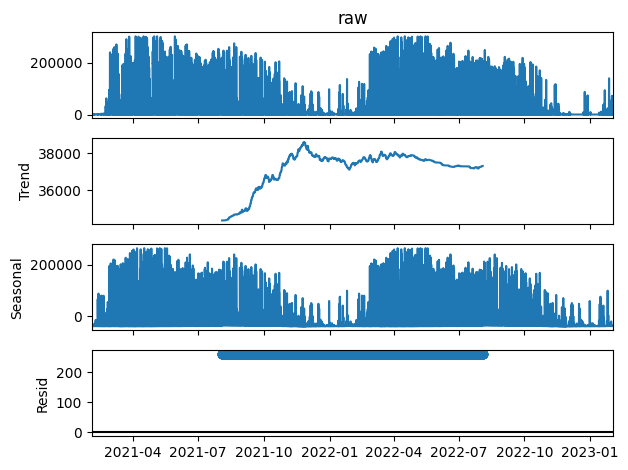

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the series
decomposition = seasonal_decompose(df['raw'], model='additive', period=24*365)

# Plot the decomposition
import matplotlib.pyplot as plt

decomposition.plot()
plt.show()


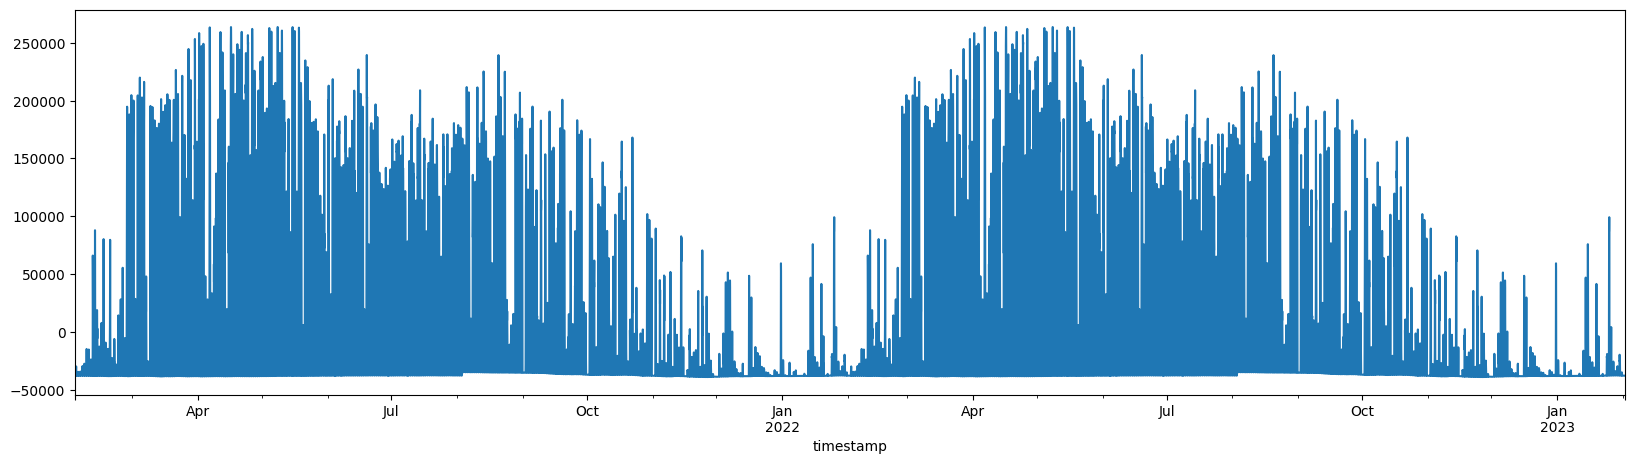

In [54]:
plt.figure(figsize=(20,5))
decomposition.seasonal.plot();

/var/folders/25/s3qpsf9n5k9g2htyymdyb8ph0000gn/T/ipykernel_99095/3680157125.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_profile = df.resample('H').mean()


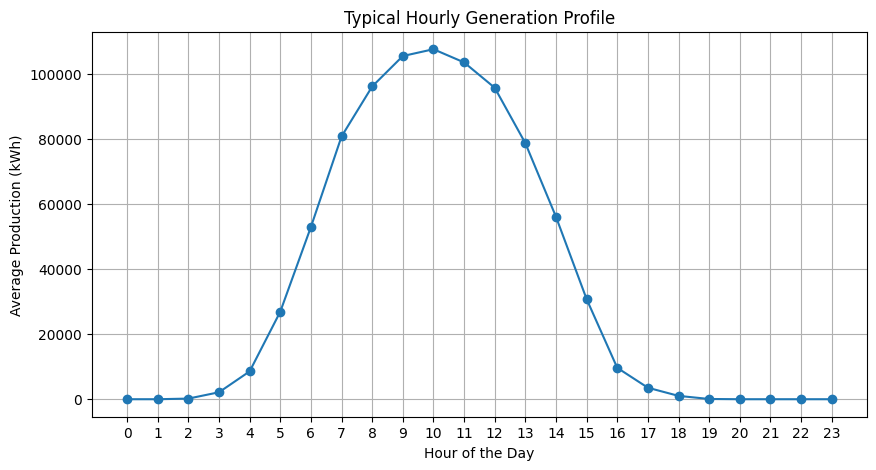

In [50]:
# Hourly average generation profile
hourly_profile = df.resample('H').mean()
hourly_profile['hour'] = hourly_profile.index.hour

# Average production per hour of the day
typical_profile = hourly_profile.groupby('hour').mean()

# Plot the typical profile
plt.figure(figsize=(10, 5))
plt.plot(typical_profile.index, typical_profile['raw'], marker='o')
plt.title('Typical Hourly Generation Profile')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Production (kWh)')
plt.grid()
plt.xticks(range(0, 24))
plt.show()


/var/folders/25/s3qpsf9n5k9g2htyymdyb8ph0000gn/T/ipykernel_99095/591398511.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_profile = df.resample('H').mean()


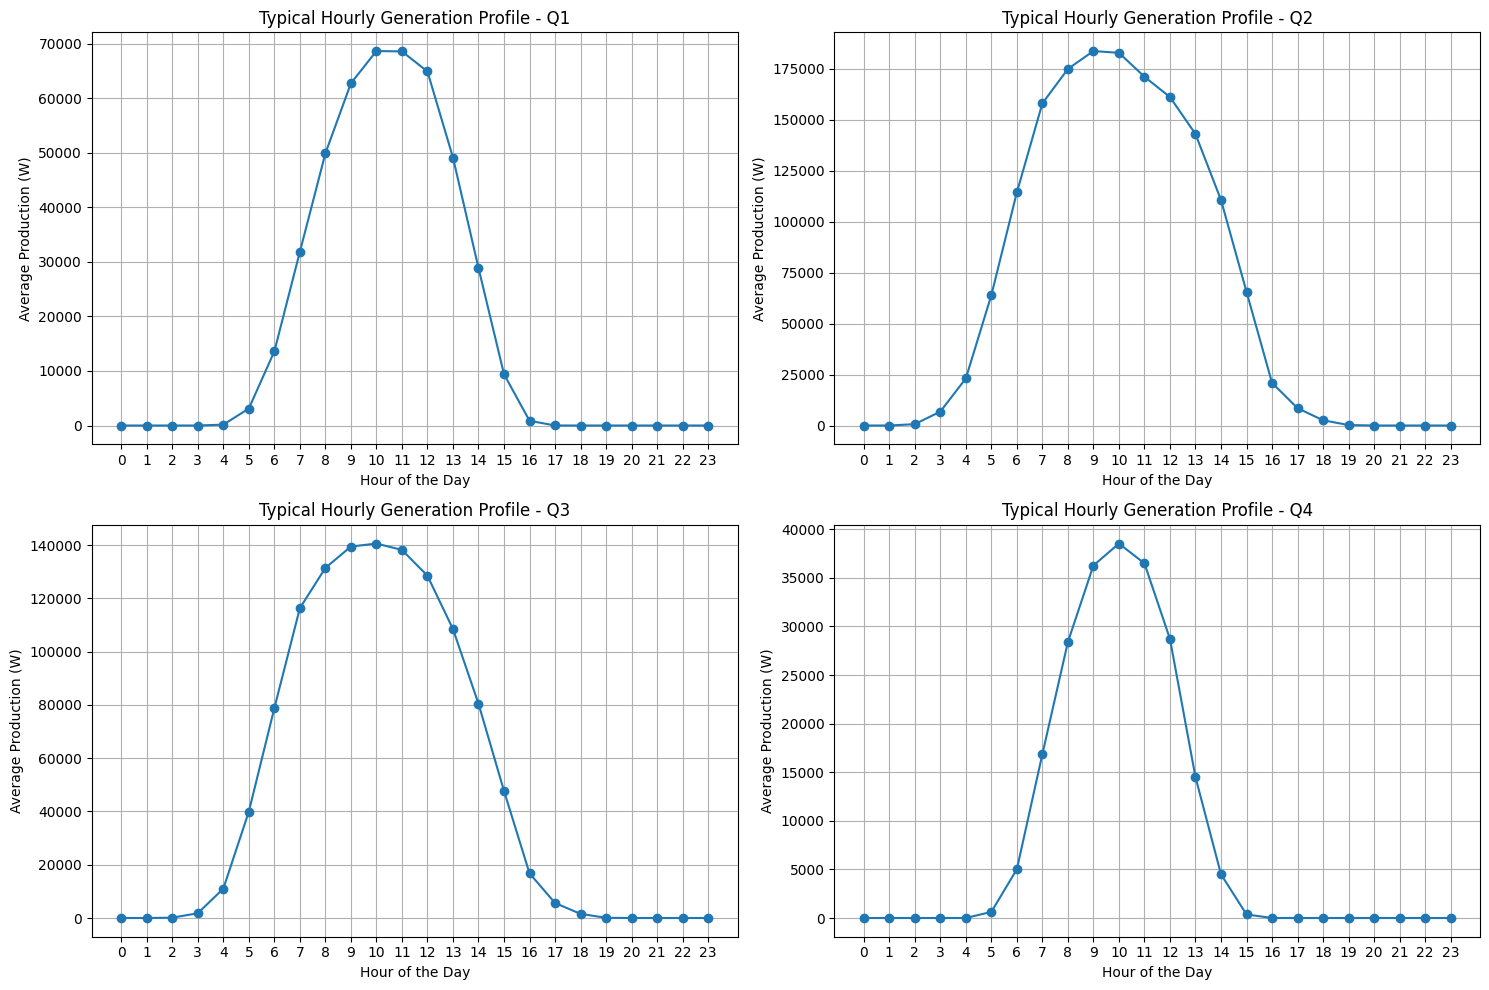

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Resample to get hourly averages
hourly_profile = df.resample('H').mean()

# Extract hour from index
hourly_profile['hour'] = hourly_profile.index.hour

# Create a new column for the quarter
hourly_profile['quarter'] = hourly_profile.index.quarter

# Initialize a figure with subplots for each quarter
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()  # Flatten to easily iterate through subplots

# Loop through each quarter and create a plot
for quarter in range(1, 5):
    # Average production per hour for the specific quarter
    typical_profile_quarter = hourly_profile[hourly_profile['quarter'] == quarter].groupby('hour').mean()
    
    # Plotting
    axes[quarter - 1].plot(typical_profile_quarter.index, typical_profile_quarter['raw'], marker='o')
    axes[quarter - 1].set_title(f'Typical Hourly Generation Profile - Q{quarter}')
    axes[quarter - 1].set_xlabel('Hour of the Day')
    axes[quarter - 1].set_ylabel('Average Production (W)')
    axes[quarter - 1].grid()
    axes[quarter - 1].set_xticks(range(0, 24))

# Adjust layout
plt.tight_layout()
plt.show()
